#Task v4 - FILTER DATASET


In [29]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
import pandas as pd



file_path = "/content/drive/MyDrive/Colab Notebooks/U_EXP/versao2/results_250417/survey_1.csv"
df_full = pd.read_csv(file_path)



display(df_full.head())
#display(df_full)

,id,B[1],B[2],B[3],B[4],B[5],B[6],B[7],B[8],P[1],...,Q02Time,Q04Time,Q05Time,submitdate,lastpage,startlanguage,seed,startdate,datestamp,ipaddr
0,1,1,2,6,3,4,7,8,5,1,...,5.38,9.91,6.54,2025-04-01 11:46:10,7,en,1264917987,2025-04-01 11:33:22,2025-04-01 11:46:10,31.30.164.38
1,2,1,4,2,7,5,3,8,6,1,...,11.31,5.00,3.07,2025-04-01 15:56:42,7,en,501456972,2025-04-01 15:41:11,2025-04-01 15:56:42,2001:4c3c:d800:8b00:45ca:e412:f4d3:36fd
2,3,1,2,5,7,6,3,8,4,2,...,5.39,4.80,4.42,2025-04-01 17:27:52,7,en,385670109,2025-04-01 17:18:57,2025-04-01 17:27:52,151.31.204.174
3,4,1,2,6,3,8,7,4,5,2,...,8.06,6.34,231.60,2025-04-02 10:41:10,7,en,1763060917,2025-04-02 10:25:47,2025-04-02 10:41:10,2a02:3100:7c4d:1e00:d0be:efa:378b:6176
4,5,1,2,5,4,3,7,8,6,2,...,9.60,5.88,3.10,2025-04-02 16:06:47,7,en,24876028,2025-04-02 15:32:14,2025-04-02 16:06:47,109.228.249.100


###FILTER

In [ ]:
# deprecated!!!    Create a new dataframe containing only rows where Q02exp is greater than or equal to 3.

df_filtered = df_full[df_full['Q02exp'] >= 2]
#df_filtered = df_full[df_full['Q02exp'] >= 3].copy()
display(df_filtered.head())


In [84]:
# Create a new dataframe containing only rows where column Q02exp is greater than or equal to 2 and column Q01 equal to Y.

# Only include participants with musical training or education. From DataFrame: df_full
df_filtered = (df_full.loc[(df_full["Q02exp"] >= 2) & (df_full["Q01"] == "Y")].copy()) # optional: isolates the result from the original df



# Delete a certain number of rows given column 'id' numbers. TO EXCLUDE INVALID PARCIPANTS.
ids_to_delete = [51]  # IDs you want to delete

# Use the ~ operator to negate the boolean indexing
df_filtered = df_filtered[~df_filtered['id'].isin(ids_to_delete)]



display(df_filtered.head())


,id,B[1],B[2],B[3],B[4],B[5],B[6],B[7],B[8],P[1],...,Q02Time,Q04Time,Q05Time,submitdate,lastpage,startlanguage,seed,startdate,datestamp,ipaddr
0,1,1,2,6,3,4,7,8,5,1,...,5.38,9.91,6.54,2025-04-01 11:46:10,7,en,1264917987,2025-04-01 11:33:22,2025-04-01 11:46:10,31.30.164.38
1,2,1,4,2,7,5,3,8,6,1,...,11.31,5.00,3.07,2025-04-01 15:56:42,7,en,501456972,2025-04-01 15:41:11,2025-04-01 15:56:42,2001:4c3c:d800:8b00:45ca:e412:f4d3:36fd
2,3,1,2,5,7,6,3,8,4,2,...,5.39,4.80,4.42,2025-04-01 17:27:52,7,en,385670109,2025-04-01 17:18:57,2025-04-01 17:27:52,151.31.204.174
3,4,1,2,6,3,8,7,4,5,2,...,8.06,6.34,231.60,2025-04-02 10:41:10,7,en,1763060917,2025-04-02 10:25:47,2025-04-02 10:41:10,2a02:3100:7c4d:1e00:d0be:efa:378b:6176
4,5,1,2,5,4,3,7,8,6,2,...,9.60,5.88,3.10,2025-04-02 16:06:47,7,en,24876028,2025-04-02 15:32:14,2025-04-02 16:06:47,109.228.249.100


In [85]:
# prompt: Count the number of rows

num_rows = len(df_full)
num_rows_filter = len(df_filtered)
print(f"\nNumber of rows: FULL:{num_rows} vs FILTERED:{num_rows_filter}")



Number of rows: FULL:24 vs FILTERED:21


In [82]:
# prompt: Display columns id and Q02exp

#display(df_full[['id', 'Q02exp']])
display(df_filtered[['id', 'Q02exp']])


,id,Q02exp
0,1,6
1,2,5
2,3,6
3,4,3
4,5,6
5,6,6
6,7,6
8,10,6
9,15,5
10,19,6


#### DATA STATS

In [87]:
# prompt: Compute the mean from column 'Q02exp'.

mean_q02exp = df_filtered['Q02exp'].mean()
print(f"The mean of 'Q02exp' is: {mean_q02exp}")


The mean of 'Q02exp' is: 5.0


##COMPUTE

####FUNCTION - GET SUBSET OF COLUMNS

In [66]:
# prompt: Create a new dataframe containing only columns B[1] through B[8] from df_filtered.
def filter_columns(df, column):

    df_subset = df.loc[:, f'{column}[1]':f'{column}[8]'].copy()

    #df_subset = df_filtered.loc[:, 'B[1]':'B[8]'].copy()
    #df_subset = df_filtered.iloc[:, 0:8].copy()  # columns 1 to 8 (0-based indexing)

    return df_subset

    print("\nSubset df:")
    display(df_subset.head())



####FUNCTION - G_TRUTH

In [53]:
# prompt: Create a dataframe named ground_truth containing a single row with numbers from 1 to 8.

import pandas as pd

def create_ground_truth(label):
    #ground_truth = pd.DataFrame([range(1, 9)])
    ground_truth = pd.DataFrame([range(1, 9)], columns=[f'{label}[{i}]' for i in range(1, 9)])

    return ground_truth

    print("\nGround Truth:")
    display(ground_truth)


####FUNCTION - KENDALLs TAU - HISTO PDF

In [103]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages


def kendall_tau_analysis(df, ground_truth, df_subset_id,
                         plotcolor, filename, output_path,
                         bin_width=0.05, label_every=1):
    """Same docstring as before – shortened here for brevity."""

    # 1 – compute τ and p for every participant
    gt = ground_truth.values.ravel()
    tau_coefficients, tau_p_values = [], []

    for _, row in df.iterrows():
        tau, p = kendalltau(gt, row.values, nan_policy="omit")
        tau_coefficients.append(tau)
        tau_p_values.append(p)

    # 2 – plot the histogram, but keep only bins with data
    with PdfPages(f"{output_path}/{filename}.pdf") as pdf:
        plt.figure(figsize=(12, 6))

        # a) build fixed‑width bins across the data’s range
        tau_arr = np.array(tau_coefficients)
        edges = np.arange(tau_arr.min(), tau_arr.max() + bin_width, bin_width)
        counts, edges = np.histogram(tau_arr, bins=edges)

        # b) filter out empty bins
        nz = counts > 0
        counts  = counts[nz]
        left    = edges[:-1][nz]            # left edge of kept bins
        centres = left + bin_width / 2      # bar centres

        # c) draw bars manually
        plt.bar(centres, counts,
                width=bin_width, align="center",
                color=plotcolor, edgecolor="black")

        # d) ticks: only the kept bins, maybe every n‑th to reduce clutter
        centres_to_show = centres[::label_every]
        plt.xticks(centres_to_show,
                   [f"{c:+.2f}" for c in centres_to_show],
                   rotation=45)

        # e) integer Y‑ticks
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

        # f) counts on top of bars
        for x, h in zip(centres, counts):
            plt.text(x, h, f"{int(h)}",
                     ha="center", va="bottom", fontsize=8)

        # titles, labels, stats inset
        mean_tau = tau_arr.mean()
        std_tau  = tau_arr.std()

        plt.title("Distribution of Kendall's Tau Coefficients")
        plt.xlabel("Kendall's Tau Coefficient")
        plt.ylabel("No. of Participants")

        plt.text(0.02, 0.98,
                 f"Mean: {mean_tau:.2f}\nSD:   {std_tau:.2f}",
                 transform=plt.gca().transAxes,
                 ha="left", va="top",
                 bbox=dict(facecolor="white", alpha=0.8))

        plt.tight_layout()
        pdf.savefig()
        #plt.close()

    # 3 – console summary
    hi  = sum(t >= 0.7 for t in tau_arr)
    med = sum((tau_arr >= 0.5) & (tau_arr < 0.7))
    lo  = sum(tau_arr < 0.5)
    tot = len(tau_arr)

    print(f"\n- - - {filename} - - -")
    print(f"\nTotal participants: {tot}")
    print(f"High agreement (τ ≥ 0.7) : {hi} ({hi/tot:0.2%})")
    print(f"Medium agreement (0.5–0.7): {med} ({med/tot:0.2%})")
    print(f"Low agreement (τ < 0.5)  : {lo} ({lo/tot:0.2%})")

    # 4 – export τ & p values
    pd.DataFrame({
        "id": df_subset_id,
        "tau_coefficient": tau_coefficients,
        "tau_p_value": tau_p_values
    }).to_csv(f"{output_path}/{filename}_results.csv", index=False)


####FUNCTION - RANK PDF

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

def plot_rank_frequency(df, output_path, filename):
    """
    Plot per‑item rank‑frequency bar charts and save them to a single‑page PDF.
    """

    # 1 – keep ranks as integers even with NaNs
    df = df.astype("Int64")

    # Use pd.Series(obj).value_counts() to avoid the warning
    #rank_frequencies = df.apply(pd.value_counts, axis=0).fillna(0).astype(int)
    rank_frequencies = df.apply(lambda x: pd.Series(x).value_counts(), axis=0).fillna(0).astype(int)


    n_items = df.shape[1]
    fig, axs = plt.subplots(1, n_items, figsize=(3.5 * n_items, 6), sharey=True)
    if n_items == 1:
        axs = [axs]

    # Use matplotlib.colormaps.get_cmap() instead of plt.cm.get_cmap()
    cmap = plt.cm.get_cmap('Paired', 8)
    rank_colours = {r: cmap(r - 1) for r in range(1, 9)}

    for idx, item in enumerate(df.columns):
        # keep only ranks with a non‑zero count
        counts = rank_frequencies[item].loc[rank_frequencies[item] != 0]

        # draw bars
        bars = axs[idx].bar(
            counts.index,                # x positions (1,2,3,… actually present)
            counts.values,
            width=0.8,
            color=[rank_colours.get(r, 'gray') for r in counts.index],
            label=str(counts.index[0]) if idx == 0 else ""
        )

        # numbers on top of bars
        for bar in bars:
            axs[idx].text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{int(bar.get_height())}",
                ha='center', va='bottom'
            )

        axs[idx].set_xlabel("Rank")
        axs[idx].set_title(item)

        # X axis: ticks only where bars exist  ───► CHANGE HERE
        axs[idx].set_xticks(counts.index)
        axs[idx].xaxis.set_major_locator(MaxNLocator(integer=True))

        # Y axis: integer tick labels
        axs[idx].yaxis.set_major_locator(MaxNLocator(integer=True))

    axs[0].set_ylabel("No. of Participants")
    fig.suptitle("Rank Frequency for Items (Small Multiples)")

    handles = [plt.Rectangle((0, 0), 1, 1, fc=rank_colours[r]) for r in range(1, 9)]
    fig.legend(
        handles, list(range(1, 9)), title="Ranks",
        loc='upper center', bbox_to_anchor=(0.5, 0), ncol=8
    )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    with PdfPages(f"{output_path}/{filename}.pdf") as pdf:
        pdf.savefig(fig)

    #plt.close(fig)


####FUNCTION - HEATMAP PDF

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

def plot_heatmap(df, output_path, filename):

    # Specify the output path for the PDF file
    export_path = f'{output_path}/{filename}.pdf'  # Your output path

    # Get frequency of ranks for each item
    rank_frequencies = df.apply(pd.value_counts, axis=0).fillna(0)  # axis=0 for columns

    # Create the heatmap and export to PDF (YlGnBu, GnBu )
    with PdfPages(export_path) as pdf:
        plt.figure(figsize=(10, 6))
        sns.heatmap(rank_frequencies, annot=True, cmap="YlGnBu", fmt=".0f")
        plt.title("Rank Frequency Heatmap")
        plt.xlabel("Item")
        plt.ylabel("Rank")

        pdf.savefig()  # Saves the current figure to the PDF
        #plt.close()    # Closes the figure to avoid overlapping

###EXECUTE


- - - b_histo - - -

Total participants: 21
High agreement (τ ≥ 0.7) : 8 (38.10%)
Medium agreement (0.5–0.7): 6 (28.57%)
Low agreement (τ < 0.5)  : 7 (33.33%)


<ipython-input-78-3e981d3bad10>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', 8)
<ipython-input-39-89ccf81008e4>:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  rank_frequencies = df.apply(pd.value_counts, axis=0).fillna(0)  # axis=0 for columns



- - - p_histo - - -

Total participants: 21
High agreement (τ ≥ 0.7) : 1 (4.76%)
Medium agreement (0.5–0.7): 6 (28.57%)
Low agreement (τ < 0.5)  : 14 (66.67%)


<ipython-input-78-3e981d3bad10>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', 8)
<ipython-input-39-89ccf81008e4>:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  rank_frequencies = df.apply(pd.value_counts, axis=0).fillna(0)  # axis=0 for columns



- - - m_histo - - -

Total participants: 21
High agreement (τ ≥ 0.7) : 6 (28.57%)
Medium agreement (0.5–0.7): 7 (33.33%)
Low agreement (τ < 0.5)  : 8 (38.10%)


<ipython-input-78-3e981d3bad10>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', 8)
<ipython-input-39-89ccf81008e4>:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  rank_frequencies = df.apply(pd.value_counts, axis=0).fillna(0)  # axis=0 for columns


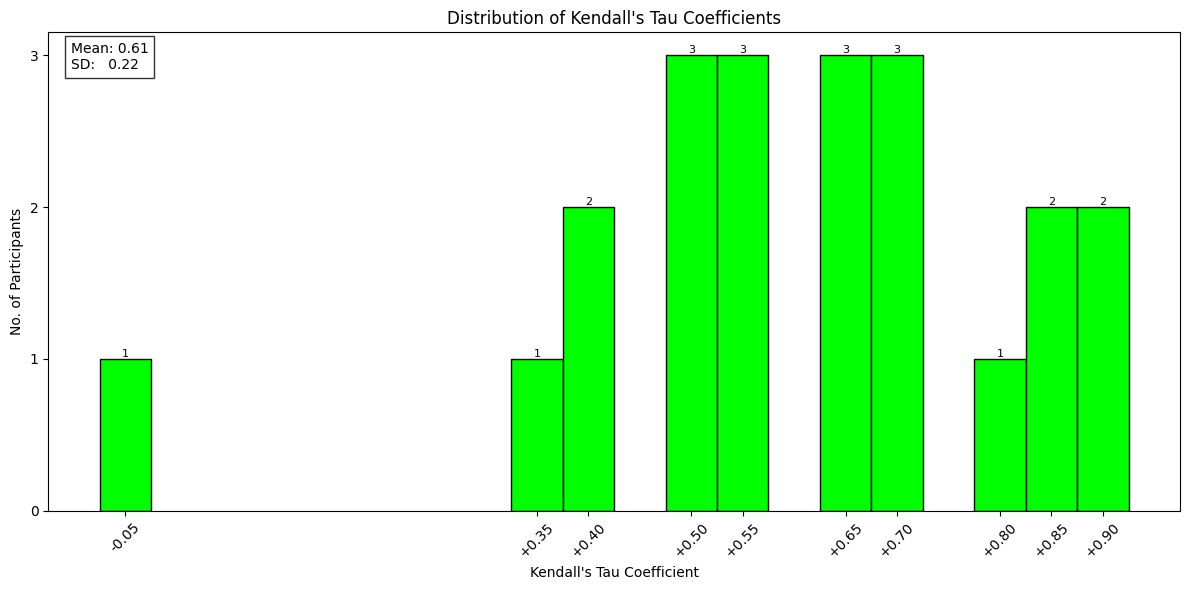

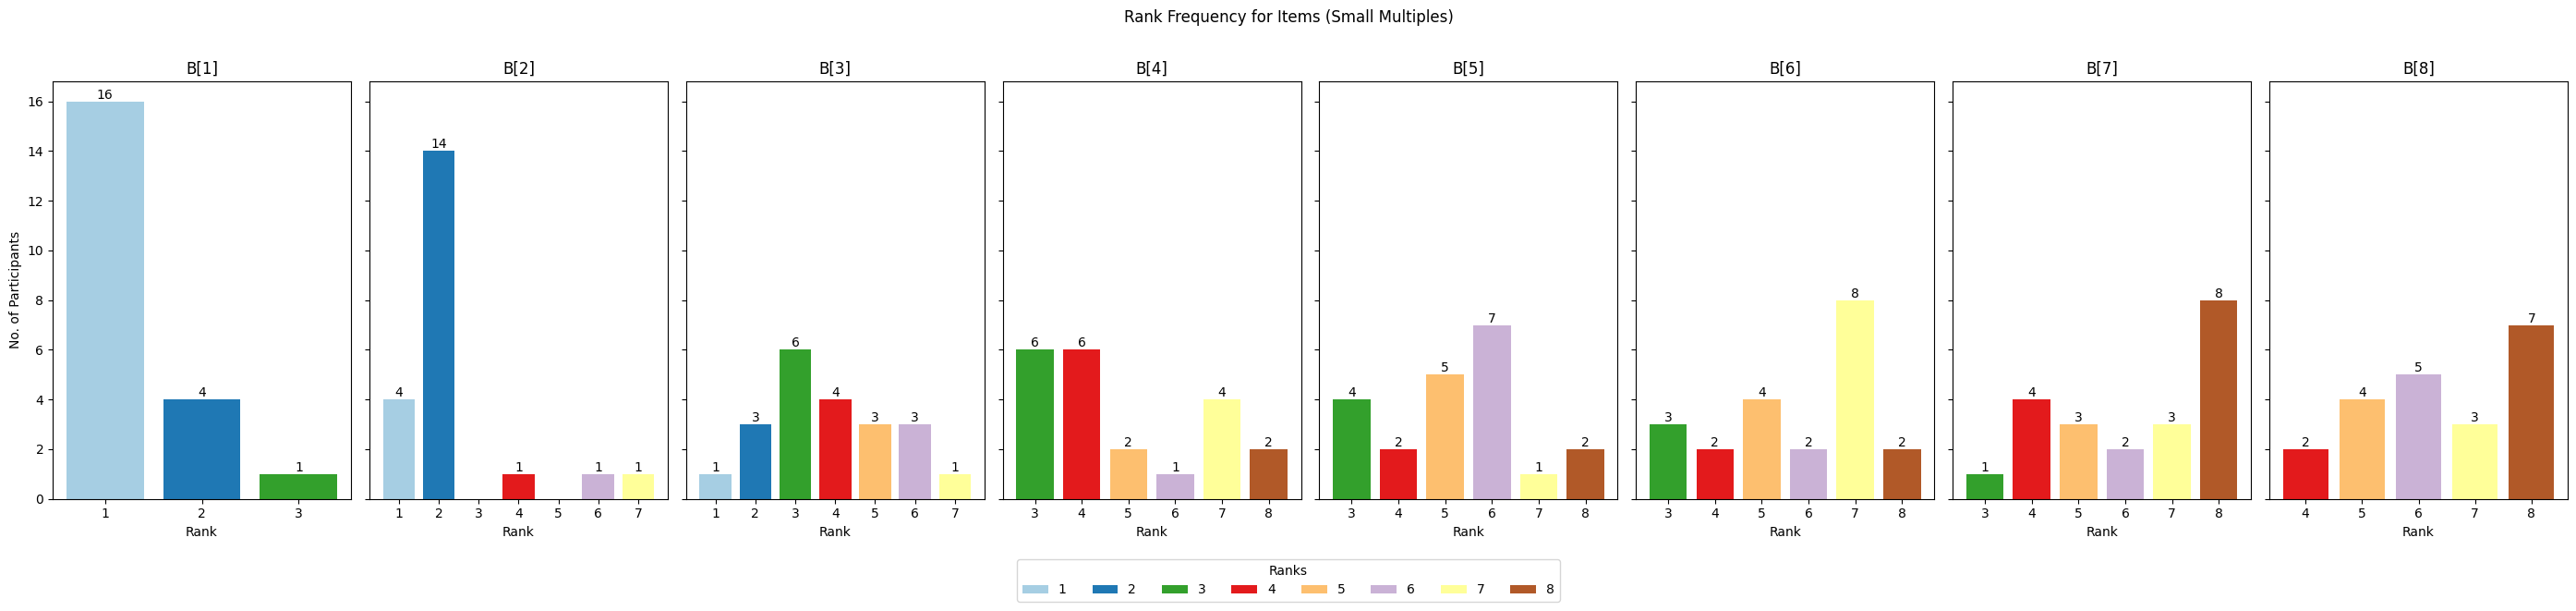

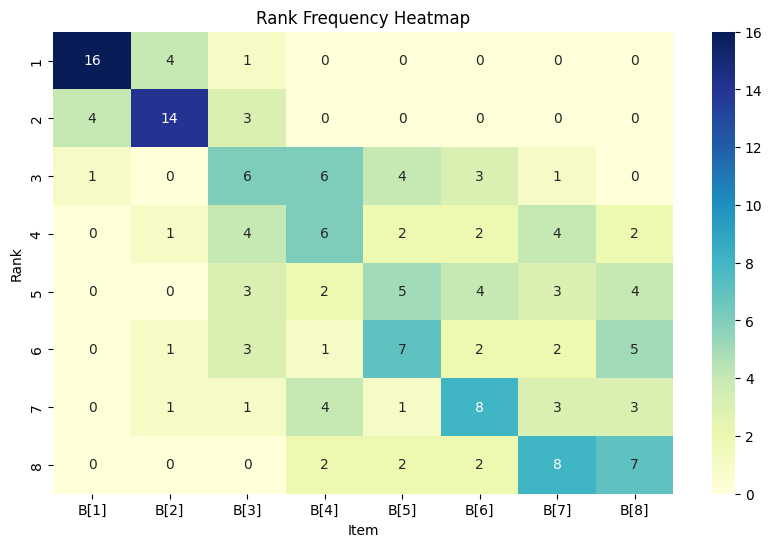

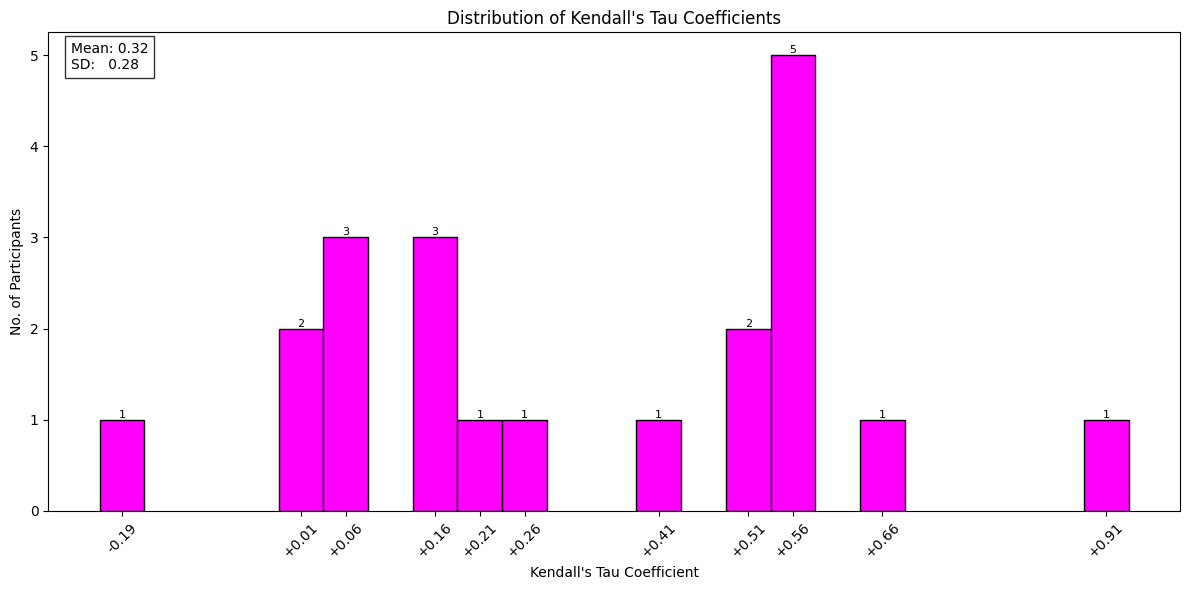

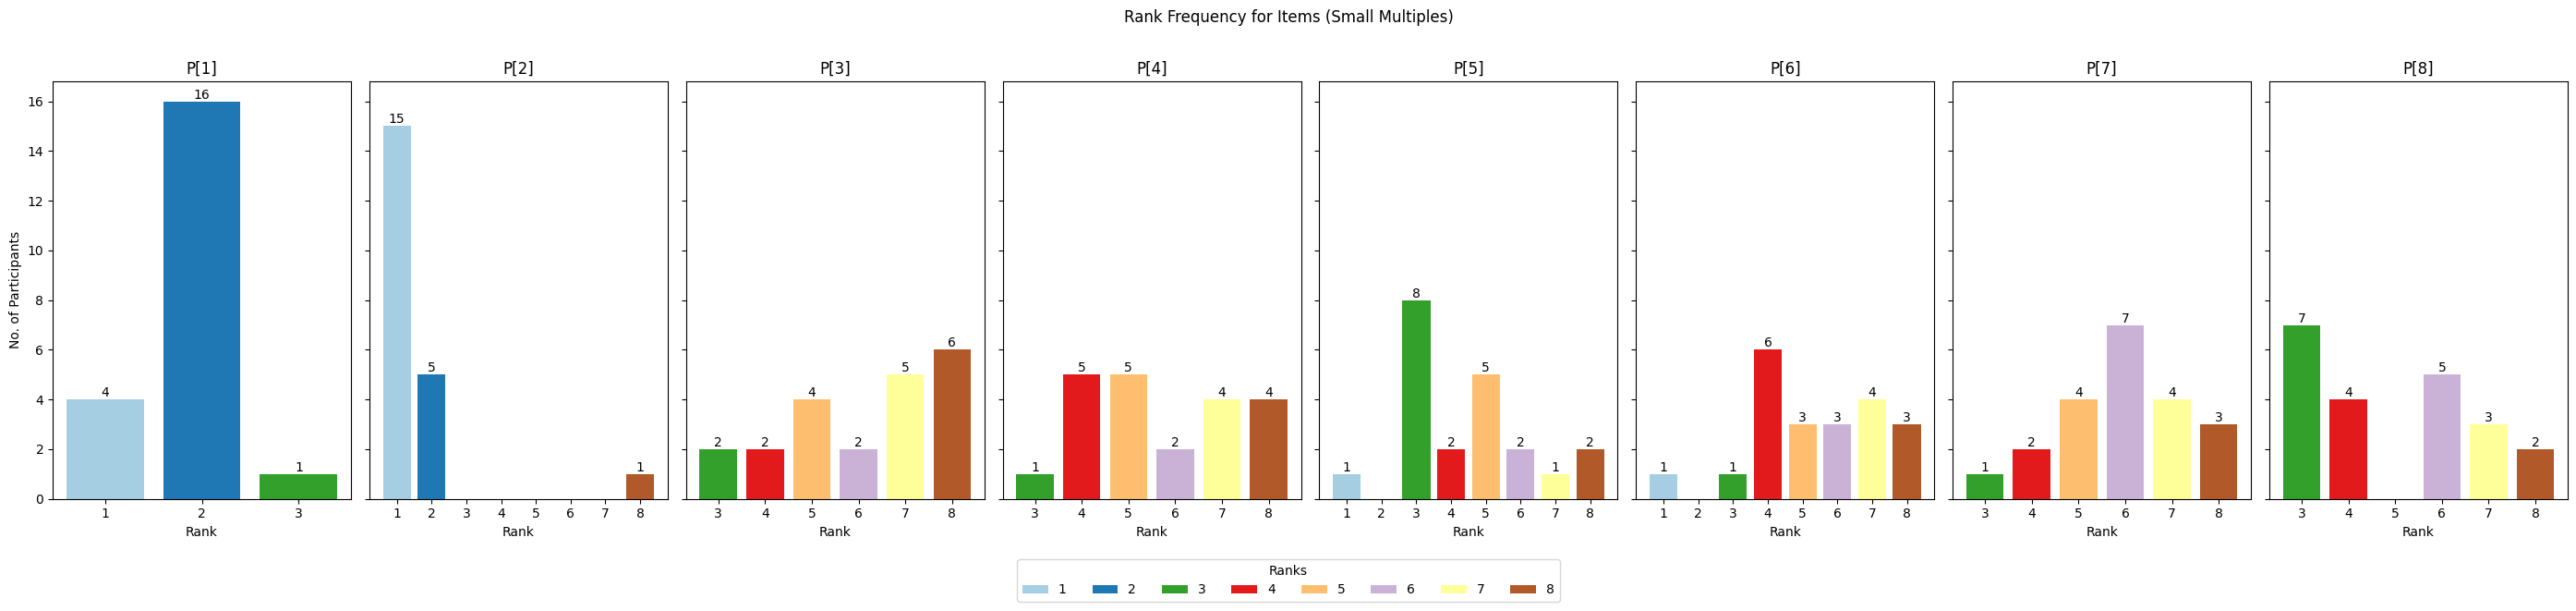

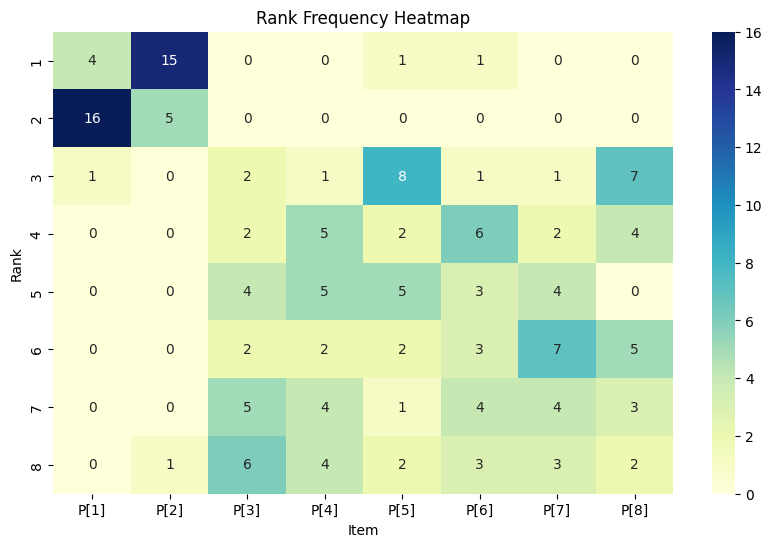

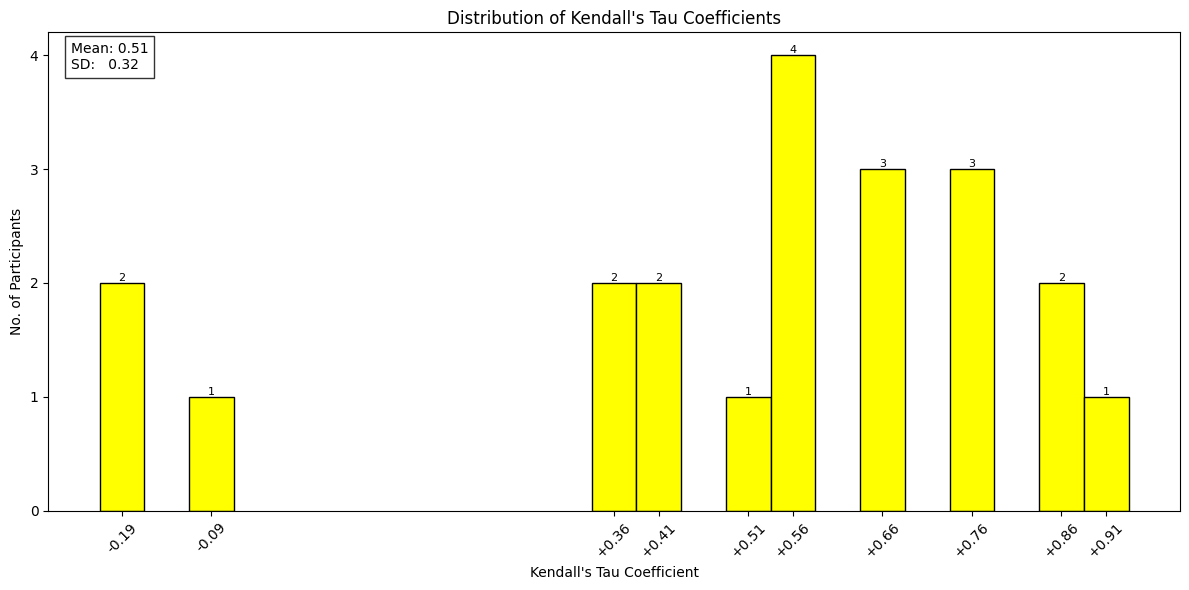

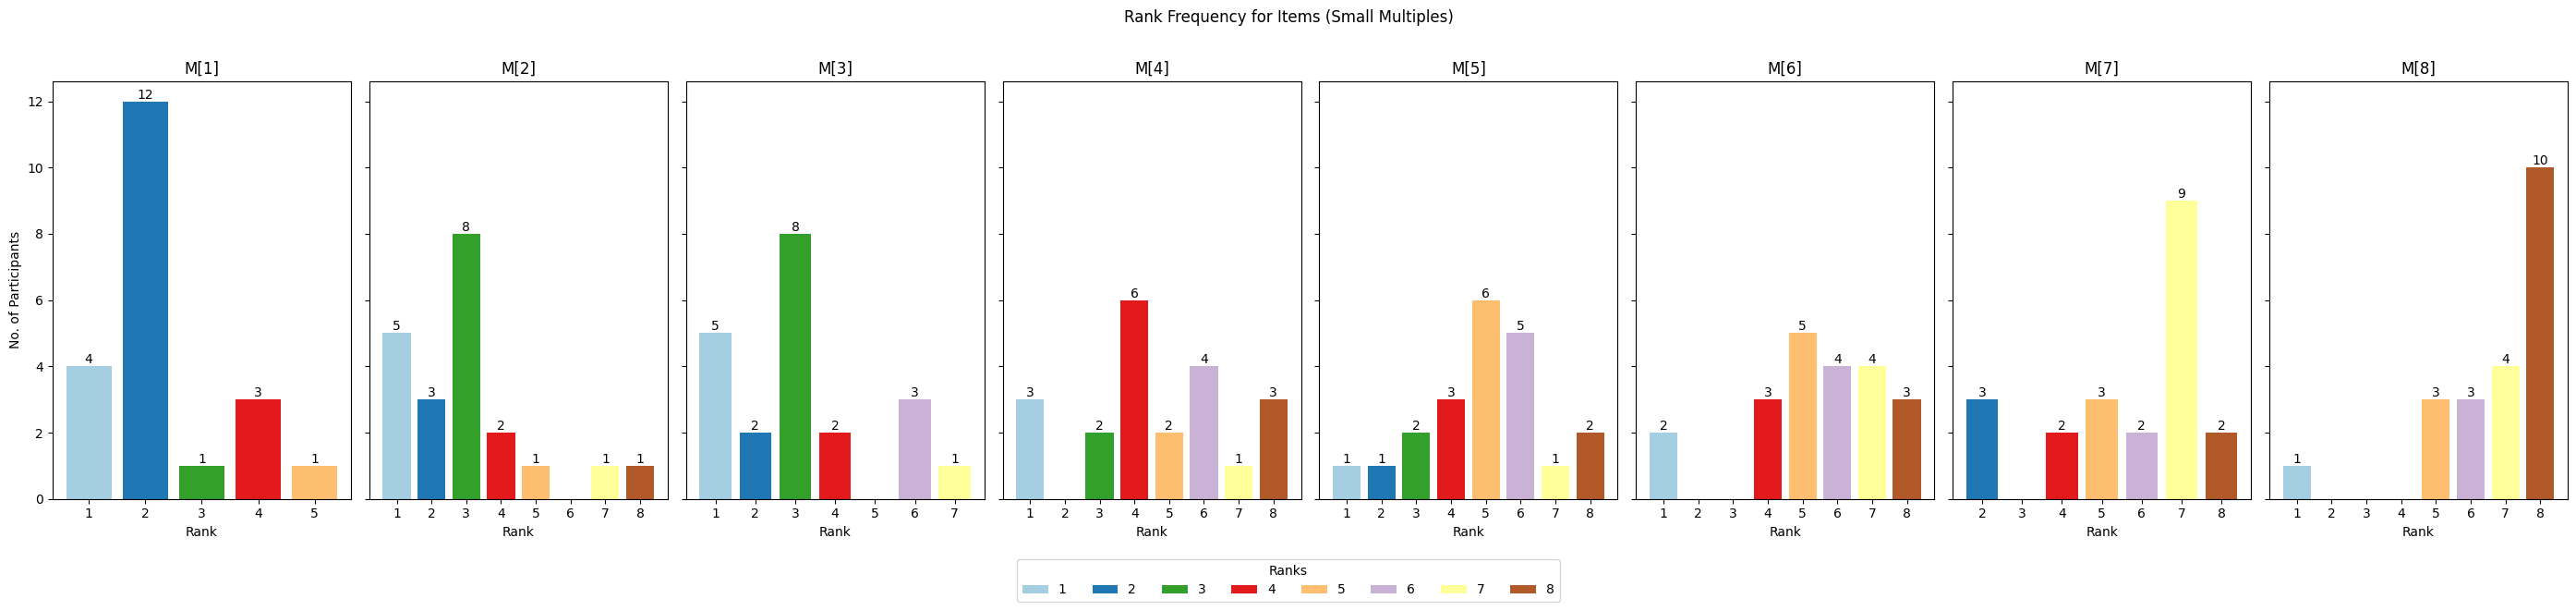

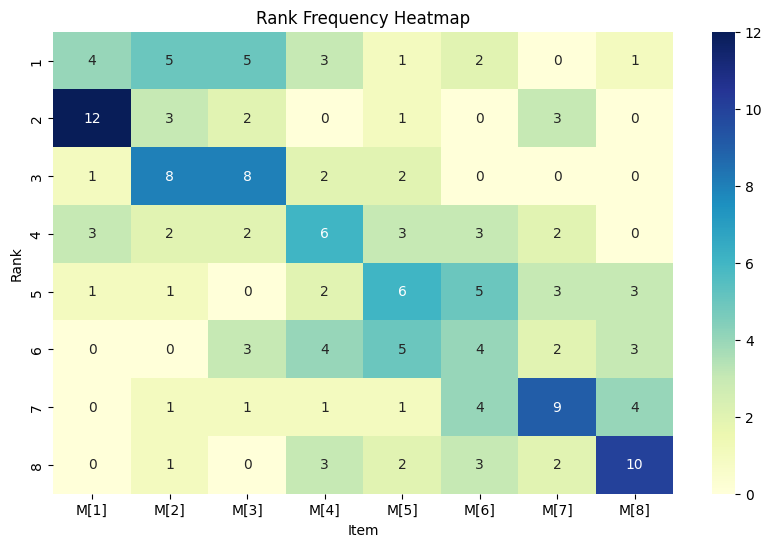

In [104]:
output_path = "/content/drive/MyDrive/Colab Notebooks/U_EXP/versao2/results_250417"

"""
def kendall_tau_analysis(
        df: pd.DataFrame,
        ground_truth: pd.Series | pd.DataFrame,
        df_subset_id: pd.Series | list | np.ndarray,
        plotcolor: str,
        filename: str,
        output_path: str,
        bin_width: float = 0.05,        # width of each histogram bar
        label_every: int = 1            # show every n‑th X‑tick (1 = all)
):

"""

# beatSync
df_subset = filter_columns(df_filtered, 'B')
df_subset_id = df_filtered['id']
ground_truth = create_ground_truth('B')
kendall_tau_analysis(df_subset, ground_truth, df_subset_id, 'lime', 'b_histo', output_path, 0.05, 1)
plot_rank_frequency(df_subset, output_path, 'b_rank')
plot_heatmap(df_subset, output_path, 'b_heatmap')

# pulseSync
df_subset = filter_columns(df_filtered, 'P')
df_subset_id = df_filtered['id']
ground_truth = create_ground_truth('P')
kendall_tau_analysis(df_subset, ground_truth, df_subset_id, 'magenta', 'p_histo', output_path, 0.05, 1)
plot_rank_frequency(df_subset, output_path, 'p_rank')
plot_heatmap(df_subset, output_path, 'p_heatmap')

# metricSync
df_subset = filter_columns(df_filtered, 'M')
df_subset_id = df_filtered['id']
ground_truth = create_ground_truth('M')
kendall_tau_analysis(df_subset, ground_truth, df_subset_id, 'yellow', 'm_histo', output_path, 0.05, 1)
plot_rank_frequency(df_subset, output_path, 'm_rank')
plot_heatmap(df_subset, output_path, 'm_heatmap')



